In [1]:
import sys
sys.path.append("../")
from painter import *

In [2]:

from painter.networks.partialUnet import PartialConvUNet
from painter.data.openimages_dataset import OpenImages
from painter.data.genmask import MaskGenerator
from painter.imports import *
from painter.utils import *
# from painter.networks.layers import PartialConv
%load_ext autoreload
%autoreload 2
 

In [4]:
from painter.networks.trash import *
generator = PConvUNet().to(device)

In [5]:
generator = PartialConvUNet().to(device)

In [6]:
train_dataset = OpenImages((64,64),datatype="train",load_mask=False,normalize=False)
val_dataset = OpenImages((64,64),datatype="validation",load_mask=False,normalize=False)

Shape of image is: torch.Size([3, 64, 64])


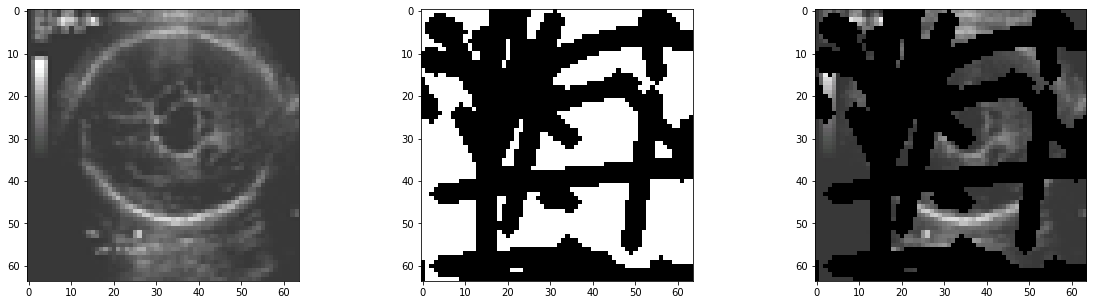

(tensor(0.0039), tensor(0.)) (tensor(0.9373), tensor(0.)) (tensor(1.), tensor(0.1882))


In [7]:

datas = train_dataset[45]
img = datas["ground_truth"]
shape = img.shape
print(f"Shape of image is: {shape}")
masked_img =  datas["input"]
mask = datas["mask"]
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(im_convert(img,denormalize=False))
axes[1].imshow(im_convert(mask,denormalize=False)*255)
axes[2].imshow(im_convert(masked_img,denormalize=False))
plt.show()
print(minmax(mask),minmax(masked_img),minmax(img))

In [8]:
train_dataloader = DataLoader(train_dataset,batch_size=1,num_workers=0)
val_dataloader = DataLoader(val_dataset,batch_size=1,num_workers=0)

In [10]:
from painter.losses import PartialConvFeatureLoss
criterion = PartialConvFeatureLoss().to(device)
criterion = InpaintingLoss()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Dhanya/.cache\torch\checkpoints\vgg16-397923af.pth


NameError: name 'device' is not defined

In [108]:
from painter.training.trainer import Trainer
trainer = Trainer(generator,train_loader=train_dataloader,validation_loader=val_dataloader,criterion=criterion)

No checkpoint path provided so loading from the starting point


In [74]:
import wandb

In [76]:
wandb.init()

wandb: ERROR Not authenticated.  Copy a key from https://app.wandb.ai/authorize


API Key:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Dhanya/.netrc


W&B Run: https://app.wandb.ai/verticalvector/uncategorized/runs/1y72n0o4

In [ ]:
trainer.train_model(start=0, end=1, b=0,eb=-1,val_loss_best=1e9,interval_verbose=1)

0
Epoch:0 [0/104] content loss :3.0122647285461426
1
Epoch:0 [1/104] content loss :3.804107189178467
2
Epoch:0 [2/104] content loss :3.5995333194732666
3
Epoch:0 [3/104] content loss :3.5928289890289307
4
Epoch:0 [4/104] content loss :3.4767558574676514
5
Epoch:0 [5/104] content loss :2.0162532329559326
6
Epoch:0 [6/104] content loss :1.1986521482467651
7
Epoch:0 [7/104] content loss :1.4315690994262695
8
Epoch:0 [8/104] content loss :1.581488847732544
9
Epoch:0 [9/104] content loss :1.012591004371643
10
Epoch:0 [10/104] content loss :2.924837589263916
11
Epoch:0 [11/104] content loss :3.313382863998413
12
Epoch:0 [12/104] content loss :2.5508413314819336
13
Epoch:0 [13/104] content loss :3.264333486557007
14
Epoch:0 [14/104] content loss :3.8433055877685547
15
Epoch:0 [15/104] content loss :3.328616142272949
16
Epoch:0 [16/104] content loss :2.288543224334717
17
Epoch:0 [17/104] content loss :1.94131338596344
18
Epoch:0 [18/104] content loss :3.0298638343811035
19
Epoch:0 [19/104] con

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <bound method AutoreloadMagics.post_execute_hook of <autoreload.AutoreloadMagics object at 0x0000009E3DB6F888>> (for post_execute):
